Stopping search: maximum iterations reached --> 100


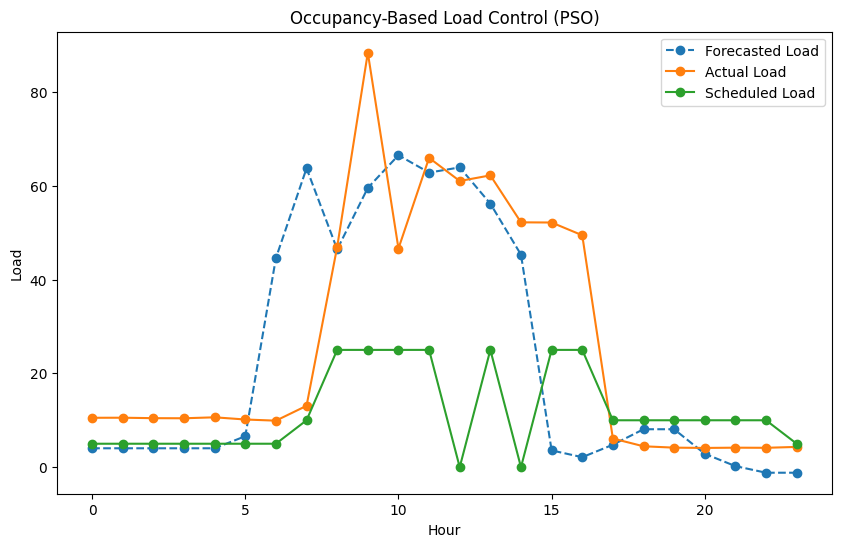

Total Energy Savings: 278.062629745 kWh
scheduled load


In [8]:
import numpy as np
import matplotlib.pyplot as plt
from pyswarm import pso
#Input data
time_hours = list(range(1, 25))
forecasted_load = np.array([4.029274761, 4.029343844, 4.028703679, 4.030159018, 4.030936197, 6.603889122, 44.59422322, 63.71282162, 46.42695157, 59.53102269, 66.49520143, 62.78931157, 63.90035595, 56.1693959, 45.29919473, 3.57544269, 2.132862115, 4.784206831, 8.088999211, 8.08883111, 2.851165809, 0.229267514, -1.179494202, -1.179436634])
occupancy = np.array([0, 0, 0, 0, 0, 0, 0, 12, 51, 59, 220, 53, 251, 112, 340, 109, 86, 44, 31, 40, 46, 46, 27, 8])
actual_load = np.array([10.53085616, 10.54476911, 10.44824568, 10.42646597, 10.63108375, 10.16490197, 9.916097139, 13.0829691, 46.95902364, 88.34063608, 46.60859693, 65.93362502, 60.99808791, 62.19939872, 52.18828273, 52.15155167, 49.43254787, 6.108531872, 4.45445186, 4.167114331, 4.103539475, 4.157906984, 4.132724773, 4.320910875])


# Define occupancy ranges
low_occupancy = [0, 10]
medium_occupancy = [11, 50]
high_occupancy = [51, 250]

# Function to categorize occupancy
def categorize_occupancy(value):
    if value in range(low_occupancy[0], low_occupancy[1] + 1):
        return "Low"
    elif value in range(medium_occupancy[0], medium_occupancy[1] + 1):
        return "Medium"
    elif value in range(high_occupancy[0], high_occupancy[1] + 1):
        return "High"

# Categorize occupancy for each hour
occupancy_categories = [categorize_occupancy(value) for value in occupancy]

# Define the objective function to be minimized (negative energy savings)
def objective_function(params, *args):
    occupancy_categories, forecasted_load, actual_load = args
    scheduled_load = np.zeros_like(occupancy)

    # Assign load values based on occupancy categories
    for i, category in enumerate(occupancy_categories):
        if category == "Low":
            scheduled_load[i] = 5  # Low occupancy load
        elif category == "Medium":
            scheduled_load[i] = 10  # Medium occupancy load
        elif category == "High":
            scheduled_load[i] = 25  # High occupancy load

    energy_savings = np.sum(actual_load) - np.sum(scheduled_load)
    return -energy_savings  # Minimize negative energy savings

# Set up the PSO optimization
lb = [-1]  # Lower bounds for the parameters (e.g., coefficients of the polynomial)
ub = [1]    # Upper bounds for the parameters
args = (occupancy_categories, forecasted_load, actual_load)

# Perform PSO optimization
best_params, _ = pso(objective_function, lb, ub, args=args)

# Generate scheduled load using the optimized parameters
scheduled_load = np.zeros_like(occupancy)
for i, category in enumerate(occupancy_categories):
    if category == "Low":
        scheduled_load[i] = 5  # Low occupancy load
    elif category == "Medium":
        scheduled_load[i] = 10  # Medium occupancy load
    elif category == "High":
        scheduled_load[i] = 25  # High occupancy load

# Graphical representation
plt.figure(figsize=(10, 6))

plt.plot(forecasted_load, label='Forecasted Load', linestyle='--', marker='o')
plt.plot(actual_load, label='Actual Load', linestyle='-', marker='o')
plt.plot(scheduled_load, label='Scheduled Load', linestyle='-', marker='o')

plt.title('Occupancy-Based Load Control (PSO)')
plt.xlabel('Hour')
plt.ylabel('Load')
plt.legend()
plt.show()

# Calculate energy savings
energy_savings = np.sum(forecasted_load) - np.sum(scheduled_load)
print(f"Total Energy Savings: {energy_savings} kWh")
print(f"scheduled load")


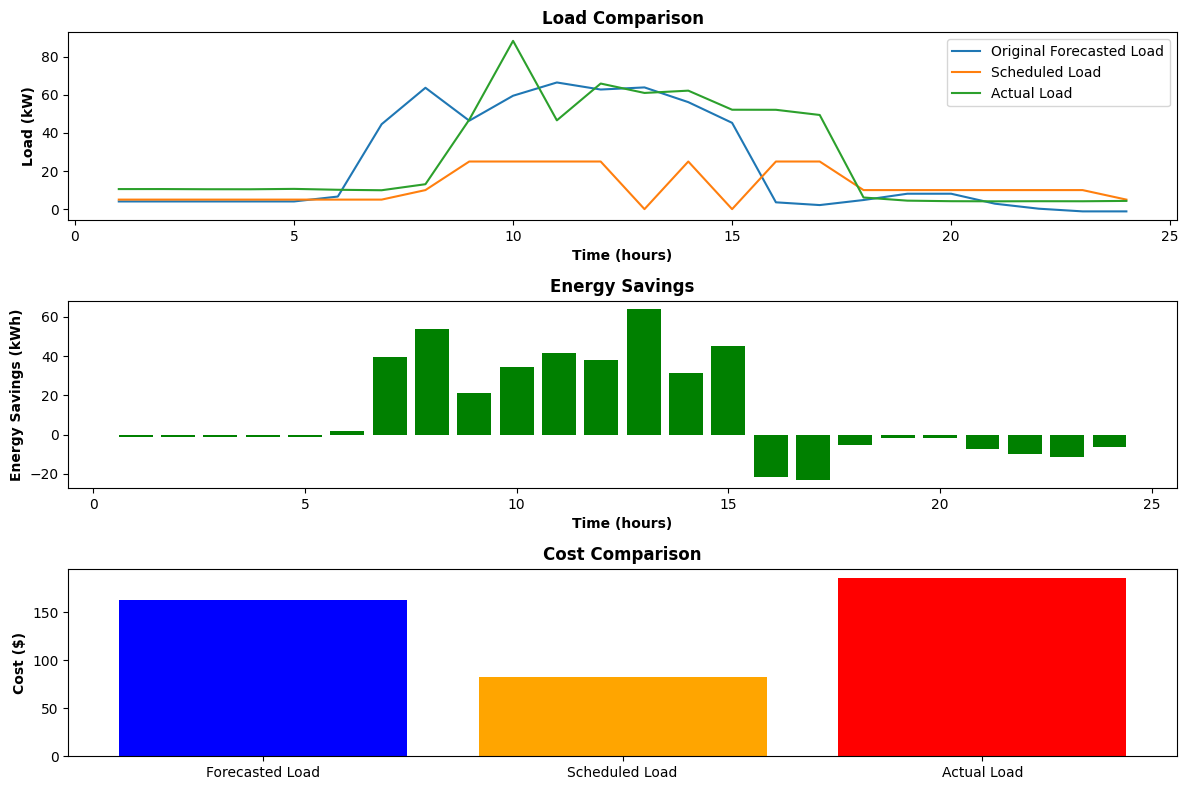

Total Energy Savings: 278.06 kWh
Percentage Energy Savings: 49.38%
Cost Savings: $80.64
Percentage Cost Savings: 49.38%


In [9]:


# Calculate cost of energy saving and actual cost (assuming a simple cost model)
cost_per_unit_energy = 0.29  # adjust this value based on your specific cost
cost_forecasted_load = sum(forecasted_load) * cost_per_unit_energy
cost_scheduled_load = sum(scheduled_load) * cost_per_unit_energy
cost_actual_load = sum(actual_load) * cost_per_unit_energy


original_cost = sum(forecasted_load)
scheduled_cost = sum(scheduled_load)
percentage_cost_savings = ((original_cost - scheduled_cost) / original_cost) * 100
original_energy = sum(forecasted_load)
scheduled_energy = sum(scheduled_load)
percentage_energy_savings = ((original_energy - scheduled_energy) / original_energy) * 100

cost_per_unit_energy = 0.29  # adjust this value based on your specific cost
cost_forecasted_load = sum(forecasted_load) * cost_per_unit_energy
cost_scheduled_load = sum(scheduled_load) * cost_per_unit_energy
cost_actual_load = sum(actual_load) * cost_per_unit_energy
energy_savings = [original - scheduled for original, scheduled in zip(forecasted_load, scheduled_load)]

# Plot the results
plt.figure(figsize=(12, 8))

plt.subplot(3, 1, 1)
plt.plot(time_hours, forecasted_load, label='Original Forecasted Load')
plt.plot(time_hours, scheduled_load, label='Scheduled Load')
plt.plot(time_hours, actual_load, label='Actual Load')
plt.xlabel('Time (hours)', fontweight='bold')
plt.ylabel('Load (kW)', fontweight='bold')
plt.title('Load Comparison', fontweight='bold')
plt.legend()

plt.subplot(3, 1, 2)
plt.bar(time_hours, energy_savings, color='green')
plt.xlabel('Time (hours)', fontweight='bold')
plt.ylabel('Energy Savings (kWh)', fontweight='bold')
plt.title('Energy Savings', fontweight='bold')

plt.subplot(3, 1, 3)
cost_comparison = [cost_forecasted_load, cost_scheduled_load, cost_actual_load]
labels = ['Forecasted Load', 'Scheduled Load', 'Actual Load']
plt.bar(labels, cost_comparison, color=['blue', 'orange', 'red'])
plt.ylabel('Cost ($)', fontweight='bold')
plt.title('Cost Comparison', fontweight='bold')

plt.subplots_adjust(hspace=0.5)  # Adjust the vertical space

plt.tight_layout()
plt.show()

# Calculate percentage cost and energy savings
percentage_energy_savings = (sum(energy_savings) / sum(forecasted_load)) * 100
percentage_cost_savings = ((cost_forecasted_load - cost_scheduled_load) / cost_forecasted_load) * 100

print(f'Total Energy Savings: {sum(energy_savings):.2f} kWh')
print(f'Percentage Energy Savings: {percentage_energy_savings:.2f}%')
print(f'Cost Savings: ${cost_forecasted_load - cost_scheduled_load:.2f}')
print(f'Percentage Cost Savings: {percentage_cost_savings:.2f}%')